# Class 18: Introduction to statistical inference

Plan for today:
- Writing a function to simulate flipping a coin
- Introduction to statistical inference
- Introduction to hypothesis tests


In [1]:
import YData

# YData.download.download_class_code(18)   # get class code    
# YData.download.download_class_code(18, TRUE) # get the code with the answers 

# YData.download.download_class_file('project_template.ipynb', 'homework')  # downloads the class project template 
# YData.download_homework(7)  # downloads the 7th homework 

YData.download_data("movies.csv")
YData.download_data("daily_bike_totals.csv")

In [2]:
## If you are using Google Colabs, you should install the YData packages and mount the your google drive by uncommenting and running the code below.

# !pip install https://github.com/emeyers/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import statistics
import pandas as pd
import numpy as np
from urllib.request import urlopen

import matplotlib.pyplot as plt
%matplotlib inline

## 0 Warm-up exercise: writing functions

For pracice writing functions, let's write a function that will mimic flipping coins. This function will be useful when we start talking about statistical inference. 

In particular, let's write a function called `flip_coins(n, prob)` which will simulate flipping a coin `n` times where:
- `n` is the number of times we have flipped the coin
- `prob` is the probability that each coin flip will return "head"

The function should return the number of "heads" that occurred from flipping the coin `n` times; i.e., it should return a number between 0, which means no heads occurred, and `n` which means a "head" occurred on every flip. 

When writing functions, it is often useful to write the bulk of the code outside of a function and then turn in into a function by wrapping your code in a `def` statement. Let's go through a few steps of writing this function now. 


#### Step 1: Generating random numbers between 0 and 1

We can use the numpy function `np.random.rand(n)` to generate `n` random numbers. Please create a name called `n` and set it equal to 500 to simulate 500 random coin flips. Then use the name `n`, along with the `np.random.rand(n)` to generate 500 random numbers between 0 and 1. Save these random numbers to the name `rand_nums`. 

Finally, to see what these numbers look like, visualize `rand_nums` using a histogram. 


[0.50993184 0.28678671 0.14322692 0.79931695 0.39459898 0.87749311
 0.9698808  0.65908352 0.28093128 0.37854565]


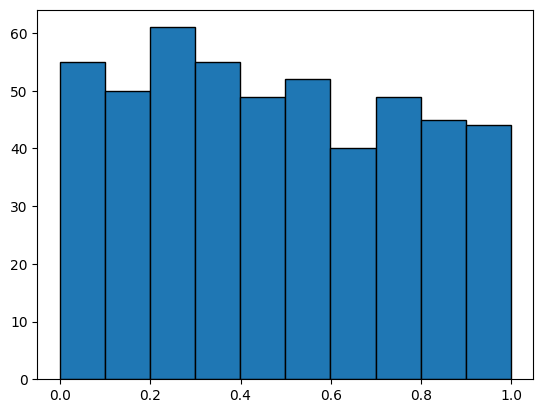

In [4]:
# Use np.random.rand() to generate n = 500 random numbers between 0 and 1, and visualize them as a histogram. 

n = 500

rand_nums = np.random.rand(n)

print(rand_nums[0:10])

plt.hist(rand_nums, edgecolor = "k");


#### Step 2: Count the number of "heads"

Next create a name called `prob` which has the probability that a coin flip is a "head". Let's set `prob` to be equal to .5 to simulate flipping a fair coin. Then see how many of the `rand_nums` are less than the `prob` value to see how many of your coin flips were "head"; i.e., use `np.sum()` to count how many of your coin flips were heads. 



In [5]:
# Set prob to .5 and count how many values are greater than prob

prob = .5

np.sum(rand_nums <= prob)

np.int64(270)

#### Step 3: Creating the function flip_coins(n, prob)

Now write the function `flip_coins(n, prob)` by taking the code you wrote in the previous two steps and turning it into a function. 

Then try out the function a few times and see how the number of "heads" you get varies from simulation to simulation, and also experiment with different values for the arguments `n` and `prob`. 


In [6]:
# Create a function flip_coins(n, prob) that generates n random numbers and returns how many are less than prob

def flip_coins(n, prob):
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    return num_heads
    

flip_coins(500, .5)

np.int64(250)

#### Step 4: Adding an additional argument to the function 

Let's add an additional parameter to the `flip_coins` function called `return_prop` which has a default value of `False`; i.e., the function should now be `flip_coins(n, prob, return_prop = False)`. If the `return_prop` is set to `True` that it should return the proportion of coin flips that were heads rather than the number of coin flips that were heads. 

Hint: Adding a conditional statement to your function could be useful. 



In [7]:
# Add an argument return_prop that when set to True will return the proporton of coin flips that were heads (rather than the number of heads)

def flip_coins(n, prob, return_prop = False):
    
    rand_nums = np.random.rand(n)
    num_heads = np.sum(rand_nums <= prob)
    
    if return_prop:
        return num_heads/n
    else:
        return num_heads
    
    
print(flip_coins(500, .5))
print(flip_coins(500, .5, True))


246
0.512


## 1. Statistical inference

In statistical inference we use a smaller sample of data to make claims about a larger population of data. 

As an example, let's look at the [2020 election](https://www.cookpolitical.com/2020-national-popular-vote-tracker) between Donald Trump and Joe Biden, and let's focus on the results from the state of Georgia. After all the votes had been counted, the resuts showed that:

- Biden received 2,461,854 votes
- Trump received 2,473,633 votes

Since we have all the votes on election data, we can precisely calculate the population parameter of the proportion of votes that Biden received, which we will denote with the symbol $\pi_{Biden}$. 

Let's create names `num_trump_votes` and `num_biden_votes`, and calculate `true_prop_Biden` which is the value $\pi_{Biden}$. 

In [8]:
num_trump_votes = 2461854  # 2,461,854
num_biden_votes = 2473633  # 2,473,633


# calculate the proportion of people who voted for Biden
true_prop_Biden = num_biden_votes/(num_biden_votes + num_trump_votes)

true_prop_Biden

0.5011932966290864

The code below creates a DataFrame called `georgia_df` that captures these election results. Each row in the DataFrame represents a votes. The column `Voted Biden` is `True` if a voter voted for Biden and `False` if the voter voted for Trump. 

In [9]:
biden_votes = np.repeat(True, num_biden_votes)     # create 2,473,633 Trues for the Biden votes
trump_votes = np.repeat(False, num_trump_votes)    # create 2,461,854 Falses for the Trump votes
election_outcome = np.concatenate((biden_votes, trump_votes))  # put the votes together

georgia_df = pd.DataFrame({"Voted Biden": election_outcome})  # create a DataFrame with the data
georgia_df = georgia_df.sample(frac = 1)   # shuffle the order to make it more realistic

georgia_df.head()

,Voted Biden
4136142,False
298141,True
1241166,True
4258907,False
4589631,False


Now suppose we didn't know the actual value of $\pi_{Biden}$ and we wanted to estimate it based on a poll of 1,000 voters. We can simulate this by using the pandas `.sample(n = )` method.

Let's simulate sampling random voters

In [10]:
# sample 10 random points
georgia_df.sample(10)  

,Voted Biden
4347907,False
1440589,True
794806,True
698383,True
2392544,True
4927733,False
1180201,True
4738588,False
865509,True
1776790,True


In [11]:
# simulate proportions of voters that voted for Biden - i.e., p-hats

one_sample = georgia_df.sample(1000)

np.mean(one_sample['Voted Biden'])

np.float64(0.503)

### 1b. Creating a sampling distribution via taking random samples

Suppose 100 polls were conducted. How many of them would show that Biden would get the majority of the vote? 

Let's simulate this "sampling distribution" of statistics now... 


In [12]:
%%time

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    
    curr_sample = georgia_df.sample(sample_size)
    prop_biden = np.mean(curr_sample["Voted Biden"])
    sampling_dist.append(prop_biden)



CPU times: user 5.97 s, sys: 177 ms, total: 6.14 s
Wall time: 6.17 s


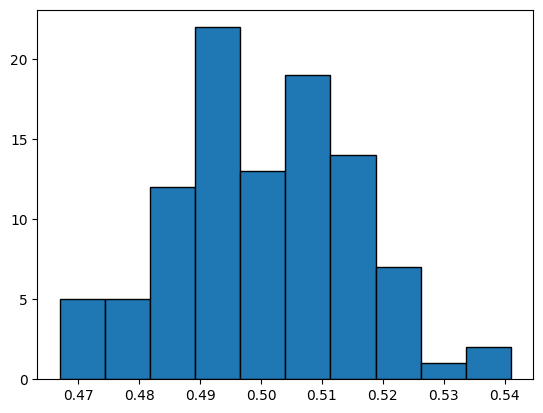

In [13]:
# plot a histogram of the sampling distribution

plt.hist(sampling_dist, edgecolor = "black");

### 1c. Creating a sampling distributions via coin flips (a faster way to simulate data)

Rather than simulating polling outcomes by pulling random samples from a DataFrame, let's simulate each vote by simulating randomly flipping a coin, where the probability of getting a "Head" (True value) is the probability of Biden getting a vote.

To do this we can use our `flip_coins(n, prob_heads, return_prop)` function we wrote in the warm-up exercises above. 
 


In [14]:
%%time

# sampling distribution of many polls conducted

sample_size = 1000
num_simulations = 100

sampling_dist = []

for i in range(num_simulations):
    prop_biden = flip_coins(sample_size,  true_prop_Biden, return_prop = True)
    sampling_dist.append(prop_biden)

CPU times: user 931 μs, sys: 0 ns, total: 931 μs
Wall time: 937 μs


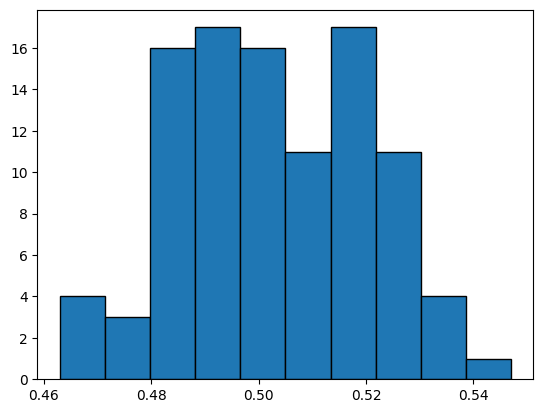

In [15]:
plt.hist(sampling_dist, edgecolor = "black", bins = 10);

## 2. Hypothesis tests

In hypothesis testing, we start with a claim about a population parameter (e.g., µ = 4.2, or π = 0.25).

This claim implies we should get a certain distribution of statistics, called "The null distribution". 

If our observed statistic is highly unlikely to come from the null distribution, we reject the claim. 

We can break down the process of running a hypothesis test into 5 steps. 

1. State the null and alternative hypothesis
2. Calculate the observed statistic of interest
3. Create the null distribution 
4. Calculate the p-value 
5. Make a decision

Let's run through these steps now!


#### Step 1: State the null and alternative hypothesis

$H_0: \pi = 0.5$

$H_A: \pi < 0.5$


#### Step 2: Calculate the observed statistic of interest


In [16]:
# load the data

movies = pd.read_csv("movies.csv")

movies.head(3)

,year,imdb,title,test,clean_test,binary,budget,domgross,intgross,code,...,director,released,actors,genre,awards,runtime,type,poster,imdb_votes,error
0,2013,tt1711425,21 &amp; Over,notalk,notalk,FAIL,13000000,25682380.0,42195766.0,2013FAIL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,tt1343727,Dredd 3D,ok-disagree,ok,PASS,45000000,13414714.0,40868994.0,2012PASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,tt2024544,12 Years a Slave,notalk-disagree,notalk,FAIL,20000000,53107035.0,158607035.0,2013FAIL,...,Steve McQueen,08 Nov 2013,"Chiwetel Ejiofor, Dwight Henry, Dickie Gravois...","Biography, Drama, History",Won 3 Oscars. Another 131 wins & 137 nominations.,134 min,movie,http://ia.media-imdb.com/images/M/MV5BMjExMTEz...,"143,446",NaN


In [17]:
# reduce data to a smaller number of columns: "title" and "binary"

movies_smaller = movies[["title", "binary"]]

In [18]:
# calculate the proportion of movies that pass the Bechdel test

booleans_passed = movies_smaller["binary"] == "PASS"

prop_passed = np.mean(booleans_passed)

prop_passed


np.float64(0.447603121516165)

#### Step 3: Create the null distribution 

We need to create a null distribution, which is the distribution of statistics we would expect to get if the null hypothesis is true. 

**Question**: about what percent of the movies would we expect to pass the Bechdel test if the null distribution was true? 

**Answer**: 50%

Let's create simulated data that is consistent with this!


In [19]:
# Let's generate one proportion consistent with the null hypothesis

# get the total number of movies in our dataset n
n = movies.shape[0]
print(n)

# proportion consistent with the null hypothesis
null_prop = .5


# one statistic consistent with null hypothesis
flip_coins(n,  null_prop, return_prop = True)



1794


np.float64(0.5055741360089187)

In [20]:
# Let's generate a null distribution 

null_dist = []

for i in range(10000):
    simulated_null_prop = flip_coins(n,  null_prop, return_prop = True)
    null_dist.append(simulated_null_prop)


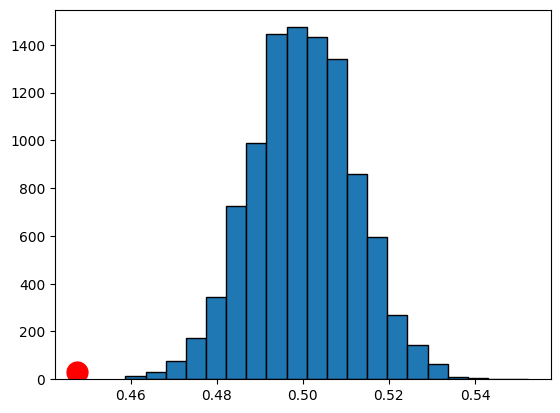

In [21]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 20) #, range = (.4, .6));
plt.plot(prop_passed, 30, '.', markersize = 30, color = "red");

#### Step 4: Calculate the p-value 

Calculate the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [22]:
# Calculate the p-value

# create a Boolean vector indicating whether each p-hat in the null distribution 
# was greater than the observed proportion that passed the Bechdel test
stats_more_extreme = np.array(null_dist) <= prop_passed

print(stats_more_extreme[0:5])

# calculate the p-value 
p_value = np.mean(stats_more_extreme)

p_value

[False False False False False]


np.float64(0.0)

#### Step 5: Make a decision

Since the p-value is very small (essentially zero) it is very unlikely that our statistic come from the null distribution. Thus we will reject the null hypothesis and conclude that less than 50% of movies pass the Bechdel test. 


## 3. Another example: Hypothesis test for a single proportion - sinister lawyers

10% of American popula on is left-handed. A study found that out of a random sample of 105 lawyers, 16 were left-handed. Use our 5 steps of hypothesis testing to assess whether the proportion of left-handed lawyers is greater than the proportion on found in the American population. 


### Step 1: State the null and alternative hypotheses

**In words** 

Null hypothesis: 10% of lawyers are left-handed.

Alternative hypothesis: More than 10% of lawyers are left-handed.


**In symbols**

$H_0$: $\pi = .10$

$H_A$: $\pi > .10$


### Step 2: Calculate the observed statistic

Calculate the observed statistic and save it to the name `obs_stat`. 

What symbol should we use to denote this observed statistic? 


In [23]:
obs_stat = 16/105

obs_stat

0.1523809523809524

### Step 3: Create the null distribution 

To create the null distribution let's use the code we wrote to simulate the proportion of heads we get from flipping a coin *n* times. 

As we discusswed above, the code `flip_coins(n, prob_heads, return_prop)` simulates flipping a coin *n* times with a probability of getting heads given by the argument `prob_heads` (make sure you understand how this code works!). 

Use this code to simulate one statistic $\hat{p}$ that is consistent with the null hypothesis below...

In [24]:

flip_coins(105, .1, return_prop = True)



np.float64(0.08571428571428572)

Now generate a null distribution, by using a for loop to create 10,000 statistics consistent with the null hypothesis. Store this null distribution in an object called `null_dist`. 

In [25]:
# Create the null distribution

null_dist = []

for i in range(10000):
    curr_null_stat = flip_coins(105, .1, return_prop = True)
    null_dist.append(curr_null_stat)



Let's also visualize the null distribution as a histogram. Set the `bins` argument to 100 to create 100 bins in this histogram. 

Does the observed statistic you calculated in step 2 seem like it is likely to come from this null distribution? 

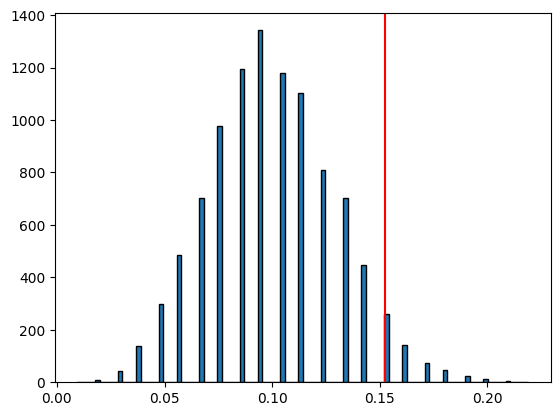

In [26]:
# visualize the null distribution 

plt.hist(null_dist, edgecolor = "black", bins = 100);


# add a red vertical line at th evalue of the observed statistic

plt.axvline(obs_stat, color = "r");


### Step 4: Calculate the p-value

The p-value is the proportion of points in the null distribution that are more extreme than the observed statistic. 


In [27]:
p_value = np.mean(np.array(null_dist) >= obs_stat)

p_value

np.float64(0.0564)

### Step 5: Draw a conclusion

Is there convincing evidence to reject the null hypothesis? 

Do you believe lawyers are more sinister than the general American public? 


<br>
<center>
<img src="https://github.com/emeyers/YData/blob/main/ClassMaterial/images/lawyer.jpg?raw=true" alt="lawyer" style="width: 200px;"/>
</center>
<br>

In [28]:
%%capture

# You can run this code to covert this Jupyter notebook into a pdf
!quarto render class_18_answers.ipynb --cache-refresh --to pdf 